## Single Object Detection using Pytorch on Pascal VOC 2007 dataset
### Understanding the Pascal VOC
Pacal VOC can be download from [this mirror](https://pjreddie.com/projects/pascal-voc-dataset-mirror/). The orginal annotations were in XML. The json annotations can be downloaded from [here](https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip)

In [67]:
import os
from pathlib import Path
import json
import random
import math

from matplotlib import pyplot as plt
from matplotlib import patches, patheffects
import cv2

import torch

from fastai.dataset import open_image

%matplotlib  inline
%reload_ext autoreload
%autoreload 2

In [18]:
#set paths to the pascal json files
homedir = os.path.expanduser('~')
pascal_home = Path(os.path.join(homedir,'data/pascal_voc'))
pascal_jhome = pascal_home.joinpath('pascal_json')
list(pascal_jhome.iterdir())

train_json = json.load(pascal_jhome.joinpath('pascal_train2007.json').open())
print(train_json.keys())

dict_keys(['images', 'type', 'annotations', 'categories'])


### JSON contents

Let us check the content of each of these dict keys

In [3]:
print('images: ',len(train_json['images']))
train_json['images'][:3]

images:  2501


[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23}]

In [4]:
print('type: ', train_json['type'])

type:  instances


In [5]:
print('annotations: ', len(train_json['annotations']))
train_json['annotations'][:2]

annotations:  7844


[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [6]:
print('categories: ', len(train_json['categories']))
train_json['categories'][:3]

categories:  20


[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'}]

### Viewing the images

In [7]:
imagedir = pascal_home.joinpath('2007/VOCdevkit/VOC2007/JPEGImages')
print('No of images: ',len(list(imagedir.iterdir())))

No of images:  5011


In [72]:
def show_img(image, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(image)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=w, foreground='black'), patheffects.Normal()])

def draw_rect(ax,b):
    patch = ax.add_patch(patches.Rectangle(b[:2],b[2],b[3]),fill=False,edgecolor='white',lw=2)
    draw_outline(patch, 4)
    
#convert voc's height, width into top-left, botton-right and switch x,y coords to be consistant with numpy
def get_plt_boundingbox(voc_bb):
    xmin, xmax, ymin, ymax = voc_bb
    
    
    

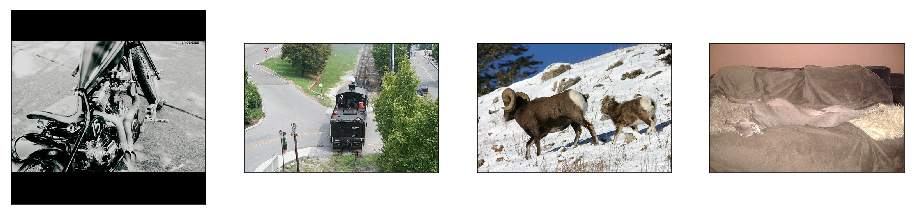

In [77]:
#show sample images
no_samples = 5
sample_images = random.choices(list(imagedir.iterdir()),k=no_samples)
fig, axs = plt.subplots(nrows=math.floor(no_samples/4),ncols=4,figsize=(16,12))
for idx, ax in enumerate(axs.flat):
    im = open_image(sample_images[idx])
    show_img(im,ax=ax)